In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc

#import psutil
from time import time
from scipy import stats
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

#from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)

knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)
print(knn.get_params)
print('KNN score - train: %f' % knn.score(X_train, y_train))
print('KNN score - test: %f' % knn.score(X_test, y_test))
print("-----------------------")
knn_final = KNeighborsClassifier(metric = 'manhattan', weights = 'uniform', n_neighbors = 10)
knn_final.fit(X_train, y_train)
print("time took: %.3f seconds "%(time() - start))  #after fitting
print("KNN final score - training (manhattan, uniform, 10n) : {:.3f}".format(knn_final.score(X_train, y_train)))
print("KNN final score - test (manhattan, uniform, 10n) : {:.3f}".format(knn_final.score(X_test, y_test)))
print("-----------------------")
knn_final2 = KNeighborsClassifier(metric = 'manhattan', weights = 'uniform', n_neighbors = 8)
knn_final2.fit(X_train, y_train)
print("time took: %.3f seconds "%(time() - start))  #after fitting
print("KNN final2 score - training (manhattan, uniform, 8n) : {:.3f}".format(knn_final2.score(X_train, y_train)))
print("KNN final2 score - test (manhattan, uniform, 8n) : {:.3f}".format(knn_final2.score(X_test, y_test)))
print("-----------------------")
y_pred = knn_final.predict(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("KNN final AUC score - training set: {:.3f}".format(roc_auc))

y_pred = knn_final.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("KNN final AUC score - test set: {:.3f}".format(roc_auc))
print("-----------------------")
#______________________________________________________________________________
knuni = KNeighborsClassifier(n_neighbors = 6, weights = 'uniform') # 'uniform', 'distance'
kndis = KNeighborsClassifier(n_neighbors = 6, weights = 'distance') # 'uniform', 'distance'
knuni.fit(X_train, y_train)
kndis.fit(X_train, y_train)
print('6 KNN uniform score - train: %f' % knuni.score(X_train, y_train))
print('6 KNN distance score - train: %f' % kndis.score(X_train, y_train))
print('6 KNN uniform score - test: %f' % knuni.score(X_test, y_test))
print('6 KNN distance score - test: %f' % kndis.score(X_test, y_test))

knuni = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform') # 'uniform', 'distance'
kndis = KNeighborsClassifier(n_neighbors = 7, weights = 'distance') # 'uniform', 'distance'
knuni.fit(X_train, y_train)
kndis.fit(X_train, y_train)
print('7 KNN uniform score - train: %f' % knuni.score(X_train, y_train))
print('7 KNN distance score - train: %f' % kndis.score(X_train, y_train))
print('7 KNN uniform score - test: %f' % knuni.score(X_test, y_test))
print('7 KNN distance score - test: %f' % kndis.score(X_test, y_test))

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')>
KNN score - train: 0.946009
KNN score - test: 0.916084
-----------------------
time took: 1655.287 seconds 
KNN final score - training (manhattan, uniform, 10n) : 0.958
KNN final score - test (manhattan, uniform, 10n) : 0.916
-----------------------
time took: 1655.313 seconds 
KNN final2 score - training (manhattan, uniform, 8n) : 0.955
KNN final2 score - test (manhattan, uniform, 8n) : 0.909
-----------------------
KNN final AUC score - training set: 0.951
KNN final AUC score - test set: 0.906
-----------------------
6 KNN uniform score - train: 0.950704
6 KNN distance score - train: 1.000000
6 KNN uniform score - test: 0.916084
6 KNN distance score - test: 0.923077
7 KNN uniform score - train: 0.946009
7 KNN distance score - train: 1.000000
7 KNN uniform score - test: 0.923077

### Grid Search

In [24]:
#grid search v. randomize search
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i)) 
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")   

#---------------------------------------------------------------------------------------------
"""algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'"""

param_grid = {'n_neighbors': np.arange(1,21),
              'metric':['euclidean', 'manhattan']}
            
grid_search = GridSearchCV(knn, param_grid = param_grid, cv = 5)
start = time()
grid_search.fit(X_train, y_train)
print("***GridSearchCV took %.2f seconds for %d candidates parameter settings." %((time() - start), len(grid_search.cv_results_['params'])))

report(grid_search.cv_results_)

***GridSearchCV took 4.92 seconds for 80 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.948 (std: 0.016)
Parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}

Model with rank: 1
Mean validation score: 0.948 (std: 0.016)
Parameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}

Model with rank: 1
Mean validation score: 0.948 (std: 0.022)
Parameters: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}

Model with rank: 1
Mean validation score: 0.948 (std: 0.022)
Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

Model with rank: 1
Mean validation score: 0.948 (std: 0.022)
Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

Model with rank: 1
Mean validation score: 0.948 (std: 0.022)
Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}

Model with rank: 1
Mean validation score: 0.948 (std: 0.022)
Parameters: {'metric': 'manhattan', 

In [28]:
param_grid = {'n_neighbors': np.arange(1,101),
              'weights': ['distance'],
               'metric':['manhattan']} #'metric'= 'manhattan'
            
grid_search = GridSearchCV(knn, param_grid = param_grid, cv = 5)
start = time()
grid_search.fit(X_train, y_train)
print("***GridSearchCV took %.2f seconds for %d candidates parameter settings." %((time() - start), len(grid_search.cv_results_['params'])))

report(grid_search.cv_results_)

***GridSearchCV took 4.99 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.948 (std: 0.022)
Parameters: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}

Model with rank: 1
Mean validation score: 0.948 (std: 0.022)
Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

Model with rank: 1
Mean validation score: 0.948 (std: 0.022)
Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

Model with rank: 1
Mean validation score: 0.948 (std: 0.022)
Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

Model with rank: 5
Mean validation score: 0.946 (std: 0.012)
Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

Model with rank: 5
Mean validation score: 0.946 (std: 0.018)
Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}



In [29]:
param_grid = {'n_neighbors': np.arange(1,101),
              'weights': ['uniform'],
               'metric':['manhattan']} #'metric'= 'manhattan'
            
grid_search = GridSearchCV(knn, param_grid = param_grid, cv = 5)
start = time()
grid_search.fit(X_train, y_train)
print("***GridSearchCV took %.2f seconds for %d candidates parameter settings." %((time() - start), len(grid_search.cv_results_['params'])))

report(grid_search.cv_results_)

***GridSearchCV took 10.06 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.948 (std: 0.016)
Parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}

Model with rank: 1
Mean validation score: 0.948 (std: 0.016)
Parameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}

Model with rank: 1
Mean validation score: 0.948 (std: 0.022)
Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

Model with rank: 1
Mean validation score: 0.948 (std: 0.022)
Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}

Model with rank: 5
Mean validation score: 0.946 (std: 0.021)
Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

Model with rank: 5
Mean validation score: 0.946 (std: 0.018)
Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

Model with rank: 5
Mean validation score: 0.946 (std: 0.022)
Parameters: {'metric': 'manhattan', 

### Validation Curve

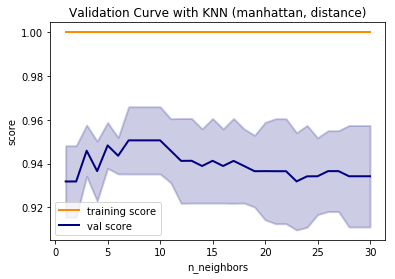

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0.93188537 0.93188537 0.94593815 0.93660824 0.94835688 0.94363401
 0.95065977 0.95065977 0.95065977 0.95065977 0.94597593 0.94129209
 0.94133112 0.93895016 0.94133112 0.93895016 0.94129209 0.93895016
 0.93656921 0.93660824 0.93656921 0.93656921 0.93192314 0.93422729
 0.93426507 0.93660699 0.93660699 0.93426507 0.93426507 0.93426507]


In [33]:
n_neighbors = range(1,31)
training_score, val_score = validation_curve(KNeighborsClassifier(metric = 'manhattan', weights = 'distance'), 
                                             X_train, y_train,
                                             param_name = "n_neighbors", 
                                             param_range = n_neighbors, cv= 7)
## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with KNN (manhattan, distance)") 
plt.xlabel("n_neighbors")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(n_neighbors, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(n_neighbors, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(n_neighbors, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(n_neighbors, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend()
plt.show()    
print(train_score_mean)
print(val_score_mean)

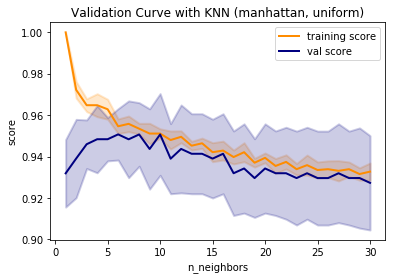

[1.         0.9722209  0.9647877  0.96478984 0.96283396 0.9546169
 0.95578571 0.95344059 0.95109548 0.95109546 0.94796863 0.94953098
 0.94522568 0.94639985 0.94209133 0.94287519 0.93974514 0.94209133
 0.93700862 0.93935589 0.93544413 0.93740216 0.93387964 0.93583338
 0.93348503 0.93387856 0.93309364 0.93387856 0.93153129 0.93270332]
[0.93188537 0.93902571 0.94593815 0.94835688 0.94835688 0.9506988
 0.94831785 0.95065977 0.94363401 0.95065977 0.93895016 0.94367304
 0.94133112 0.94133112 0.9389892  0.94133112 0.93192314 0.93422729
 0.92958122 0.93422729 0.93192314 0.93192314 0.92958122 0.93192314
 0.92958122 0.92958122 0.93192314 0.92958122 0.929619   0.92727708]


In [35]:
n_neighbors = range(1,31)
#criterion = 'entropy'
training_score, val_score = validation_curve(KNeighborsClassifier(metric = 'manhattan', weights = 'uniform'), 
                                             X_train, y_train,
                                             param_name = "n_neighbors", 
                                             param_range = n_neighbors, cv= 7)
## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with KNN (manhattan, uniform)") 
plt.xlabel("n_neighbors")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(n_neighbors, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(n_neighbors, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(n_neighbors, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(n_neighbors, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend()
plt.show()    
print(train_score_mean)
print(val_score_mean)

### Learning Curve

<module 'matplotlib.pyplot' from 'c:\\users\\nfleming\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

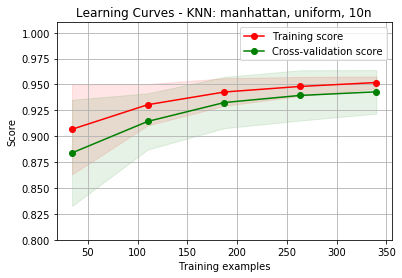

In [46]:
#learning curve
def plot_learning_curve (estimator, title, X,y, ylim = None, cv = None, 
                         n_jobs = None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim (*ylim)
    plt.xlabel ("Training examples")
    plt.ylabel ("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-validation score")
    plt.legend(loc ="best")
    return plt

X, y = X_train, y_train

title = "Learning Curves - KNN: manhattan, uniform, 10n"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = knn_final
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

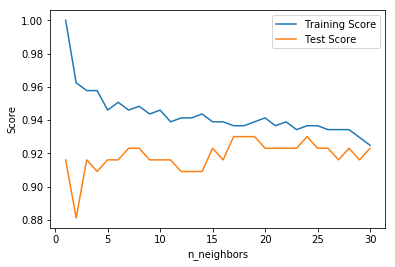

In [11]:
training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 20
n_settings = range(1,31)

for n_neighbors in n_settings:
    knclf = KNeighborsClassifier(n_neighbors = n_neighbors)
    knclf.fit(X_train, y_train)
    training_accuracy.append(knclf.score(X_train, y_train))
    test_accuracy.append(knclf.score(X_test, y_test))
    
plt.plot(n_settings, training_accuracy, label = "Training Score")
plt.plot(n_settings, test_accuracy, label = "Test Score")
plt.ylabel("Score")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [ ]:
training_accuracy2 = []
test_accuracy2 = []
#try n_neighbors from 1 to 20
n_settings = range(1,31)

for n_neighbors in n_settings:
    knclf = KNeighborsClassifier(n_neighbors = n_neighbors)
    knclf.fit(X_train, y_train)
    training_accuracy.append(knclf.score(X_train, y_train))
    test_accuracy.append(knclf.score(X_test, y_test))
    
plt.plot(n_settings, training_accuracy, label = "Training Score")
plt.plot(n_settings, test_accuracy, label = "Test Score")
plt.ylabel("Score")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [28]:
print(test_accuracy)
print(training_accuracy)
#for score in test_accuracy:
#    print("{:.3f}".format(score))

[0.916083916083916, 0.8811188811188811, 0.916083916083916, 0.9090909090909091, 0.916083916083916, 0.916083916083916, 0.9230769230769231, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9230769230769231, 0.916083916083916, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9300699300699301, 0.9230769230769231, 0.9230769230769231, 0.916083916083916, 0.9230769230769231, 0.916083916083916, 0.9230769230769231]
[1.0, 0.9624413145539906, 0.9577464788732394, 0.9577464788732394, 0.9460093896713615, 0.9507042253521126, 0.9460093896713615, 0.9483568075117371, 0.9436619718309859, 0.9460093896713615, 0.9389671361502347, 0.9413145539906104, 0.9413145539906104, 0.9436619718309859, 0.9389671361502347, 0.9389671361502347, 0.9366197183098591, 0.9366197183098591, 0.9389671361502347, 0.9413145539906104, 0.9366197183098591, 0.9

[1.         0.96400278 0.95931145 0.95383412 0.9460106  0.94835681
 0.945616   0.94600739 0.9413182  0.94444183 0.94014403 0.94327194
 0.94013974 0.94092145 0.93818065 0.93857311 0.93818172 0.93857204
 0.93818172 0.9374     0.9366183  0.93583873 0.93192054 0.93075173
 0.92918724 0.92840553 0.92840552 0.92997002 0.92840338 0.92723029]
[0.9224774  0.93192314 0.94125305 0.93894891 0.94363401 0.94609176
 0.94129209 0.94371081 0.93656921 0.93664602 0.93660824 0.93895016
 0.93422729 0.93422729 0.93422729 0.93422729 0.93422729 0.93422729
 0.93188537 0.93188537 0.93188537 0.93188537 0.92493516 0.92962026
 0.92259324 0.9272393  0.92259324 0.92493516 0.92259324 0.92259324]


Text(0, 0.5, 'score')

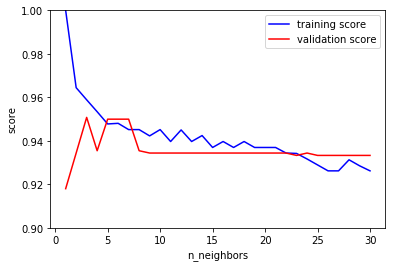

In [60]:
n_settings = range(1,31)
training_score, val_score = validation_curve(KNeighborsClassifier(), 
                                             X_train, y_train,
                                             param_name = "n_neighbors", 
                                             param_range = n_settings, cv= 7)
print(np.mean(training_score,1))
print(np.mean(val_score,1))
plt.plot(n_settings, np.median(training_score, 1), color = 'b', label = 'training score')
plt.plot(n_settings, np.median(val_score,1), color = 'r', label = 'validation score')
plt.legend()
plt.ylim(0.9,1)
plt.xlabel('n_neighbors')
plt.ylabel('score')

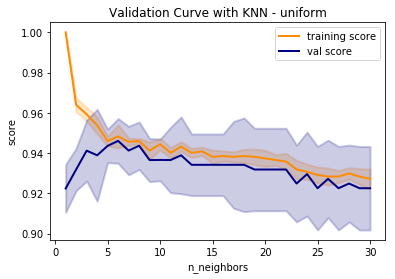

In [61]:
n_settings = range(1,31)
training_score, val_score = validation_curve(KNeighborsClassifier(weights = 'uniform'), 
                                             X_train, y_train,
                                             param_name = "n_neighbors", 
                                             param_range = n_settings, cv= 7)
## 8 is ideal?
train_score_mean = np.mean(training_score, 1)
train_score_std = np.std(training_score, 1)
val_score_mean = np.mean(val_score, 1)
val_score_std = np.std(val_score, 1)
plt.title("Validation Curve with KNN - uniform") 
plt.xlabel("n_neighbors")
plt.ylabel("score")
#plt.ylim(0.9,1)
lw = 2
plt.plot(n_settings, train_score_mean, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(n_settings, 
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(n_settings, val_score_mean, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(n_settings, 
                 val_score_mean - val_score_std,
                 val_score_mean + val_score_std,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend()
plt.show()    

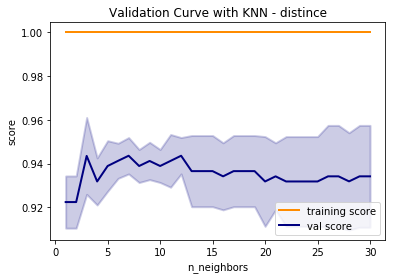

In [66]:
n_settings = range(1,31)
training_score2, val_score2 = validation_curve(KNeighborsClassifier(weights = 'distance'), 
                                             X_train, y_train,
                                             param_name = "n_neighbors", 
                                             param_range = n_settings, cv= 7)
## 8 is ideal?
train_score_mean2 = np.mean(training_score2, 1)
train_score_std2 = np.std(training_score2, 1)
val_score_mean2 = np.mean(val_score2, 1)
val_score_std2 = np.std(val_score2, 1)
plt.title("Validation Curve with KNN - distince") 
plt.xlabel("n_neighbors")
plt.ylabel("score")
#plt.ylim(0.9,1.1)
lw = 2
plt.plot(n_settings, train_score_mean2, label = 'training score', color = 'darkorange', lw = lw)
plt.fill_between(n_settings, 
                 train_score_mean2 - train_score_std2,
                 train_score_mean2 + train_score_std2,
                 alpha = 0.2, color = 'darkorange', lw = lw)           
plt.plot(n_settings, val_score_mean2, label = 'val score', color = 'navy', lw = lw)
plt.fill_between(n_settings, 
                 val_score_mean2 - val_score_std2,
                 val_score_mean2 + val_score_std2,
                 alpha = 0.2, color = 'navy', lw = lw) 
plt.legend()
plt.show()    

<module 'matplotlib.pyplot' from 'c:\\users\\nfleming\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

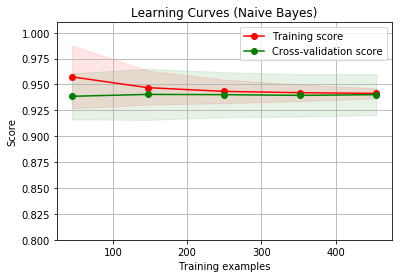

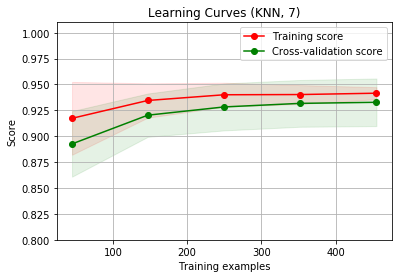

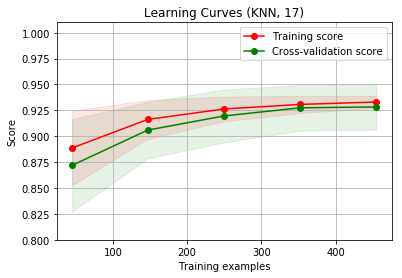

In [16]:
def plot_learning_curve (estimator, title, X,y, ylim = None, cv = None, 
                         n_jobs = None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim (*ylim)
    plt.xlabel ("Training examples")
    plt.ylabel ("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-validation score")
    plt.legend(loc ="best")
    return plt

X, y = cancer.data, cancer.target
title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

title = "Learning Curves (KNN, 7)"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform')
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

title = "Learning Curves (KNN, 17)"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = KNeighborsClassifier(n_neighbors = 17, weights = 'uniform')
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

<module 'matplotlib.pyplot' from 'c:\\users\\nfleming\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

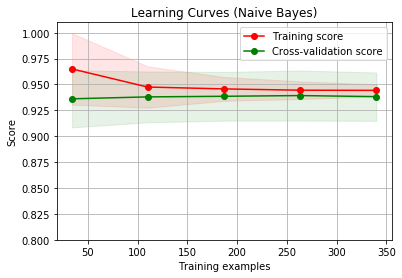

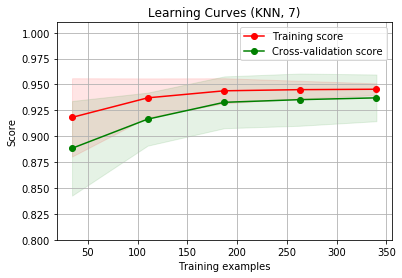

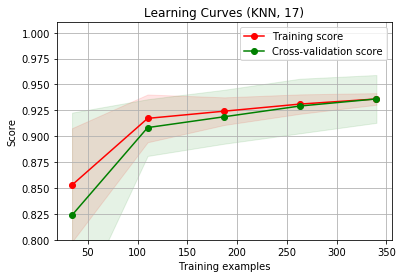

In [17]:
X, y = X_train, y_train
title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

title = "Learning Curves (KNN, 7)"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform')
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)

title = "Learning Curves (KNN, 17)"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 1)
estimator = KNeighborsClassifier(n_neighbors = 17, weights = 'uniform')
plot_learning_curve(estimator, title, X, y, ylim = (0.8, 1.01), cv = cv, n_jobs = 4)